# ShallowNet Implementation

## ShallowNet Imports

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


## ShallowNet Network Creation

In [0]:
class ShallowNet:
  def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    if K.image_data_format() == "channel_first":
      inputShape = (depth, height, width)
      
    model.add(Conv2D(32, (3, 3), padding = "same", 
                     input_shape = inputShape))
    model.add(Activation("relu"))
    model.add(Flatten())
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

# ShallowNet Training

## Training Imports

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

## CIFAR-10 Data Download & Organization
load the training and testing data, then normalize it into the range [0, 1]

In [0]:
print("[INFO] accessing CIFAR10...\n\n")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] accessing CIFAR10...


170500096/170498071 [==============================] - 2s 0us/step


### Labeling Data

convert the labels from integers to vectors

In [0]:
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Model 

initialize the optimizer and model

In [0]:
print("[INFO] compiling model...\n\n")
opt = SGD(lr = 0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

[INFO] compiling model...







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________
None


## Training
Training the model

In [0]:
print("[INFO] training network...\n\n")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] training network...


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/40





50000/50000 [==============================] - 13s 266us/step - loss: 1.8235 - acc: 0.3605 - val_loss: 1.6986 - val_acc: 0.4018
Epoch 2/40
50000/50000 [==============================] - 7s 131us/step - loss: 1.5672 - acc: 0.4574 - val_loss: 1.5833 - val_acc: 0.4322
Epoch 3/40
50000/50000 [==============================] - 6s 130us/step - loss: 1.4037 - acc: 0.5094 - val_loss: 1.3730 - val_acc: 0.5143
Epoch 4/40
50000/50000 [==============================] - 7s 131us/step - loss: 1.3144 - acc: 0.5392 - val_loss: 1.3497 - val_acc: 0.5210
Epoch 5/40
50000/50000 [==============================] - 7s 132us/step - loss: 1.2630 - acc: 0.5585 - val_loss: 1.2930 - val_acc: 0.5396
Epoch 6/40
50000/50000 [==============================] - 6s 129us/step - loss: 1.2255 - acc: 0.5718 - val_loss: 1.2980 - val_ac

### Evaluation

evaluate the network

In [0]:
print("[INFO] evaluating network...\n\n")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), 
                            target_names=labelNames))

[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.67      0.60      0.64      1000
  automobile       0.64      0.80      0.72      1000
        bird       0.44      0.49      0.46      1000
         cat       0.41      0.45      0.43      1000
        deer       0.56      0.45      0.50      1000
         dog       0.59      0.38      0.46      1000
        frog       0.52      0.81      0.64      1000
       horse       0.70      0.66      0.68      1000
        ship       0.71      0.74      0.73      1000
       truck       0.75      0.53      0.62      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



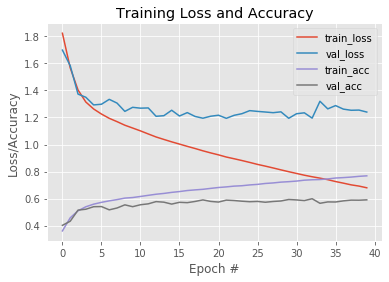

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()